In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_cleaning
import os
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

## World Data 2023 DataFrame

In [2]:
data = pd.read_csv('../dataset/world-data-2023.csv')
df = data.copy()

# I want all the columns to be displayed
pd.set_option('display.max_columns', None)
df.head(10)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,113.81,1.20%,XCD,1.99,22.30%,$0.99,"$1,727,759,259",105.00%,24.80%,5.0,"St. John's, Saint John",76.9,42.0,$3.04,English,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,53.50%,ARS,2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,Buenos Aires,76.5,39.0,$3.35,Spanish,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",129.18,1.40%,AMD,1.76,11.70%,$0.77,"$13,672,802,158",92.70%,54.60%,11.0,Yerevan,74.9,26.0,$0.66,Armenian,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",119.8,1.60%,AUD,1.74,16.30%,$0.93,"$1,392,680,589,329",100.30%,113.10%,3.1,Sydney,82.7,6.0,$13.59,NaN,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",118.06,1.50%,EUR,1.47,46.90%,$1.20,"$446,314,739,528",103.10%,85.10%,2.9,Vienna,81.6,5.0,NaN,German,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


## Socioeconomic and Environmental data

This project involves the analysis of various socioeconomic and environmental factors across differente countries. The goal is to explore and uncover meaningful insights regarding how factors like GDP, population density, health indicators, CO2 emissions, and more impact a country's development and overall well-being.

### Key Features:
- **Country Characteristics**: information about the country (`Country`, `Abbreviation`, `Capital/Major City`).
- **Country Details**: calling number, currency code and official language (`Calling Code`, `Capital/Major City`, `Official Language`).
- **Population Details**: population related details for each country, like density, largest city by population, etc (`Density (P/Km²)`, `Largest City`, `Population`, `Urban Population`, `Birth Rate`, etc.).
- **Health Indicators**: health factors (`Fertility Rate`, `Infant Mortality`, `Life Expectancy`, `Maternal Mortality Ratio`, etc.).
- **Environmental Factors**: environmental factors for each country (`Agricultural Land (%)`, `CO2 Emissions`, `Forested Area (%)`, etc.).
- **Economic Indicators**: Details about inflation, price of gasolina, unemployment rate, etc.(`CPI (Consumer Price Index)`, `CPI Change (%)`, `Gasoline Price`, `GDP`, `Minimum Wage`, `Tax Revenue (% of GDP)`, `Total Tax Rate`, `Unemployment Rate`, etc.).
- **Education Details**: details related to the level of education (`Gross Primary Education Enrollment (%)`, `Gross Tertiary Education Enrollment (%**)`, etc.).
- **Country's location**: latitude and longitude (`Latitude`, `Longitude`, `Land Area (Km²)`, etc.).

### Summary:
- **Total Features**: 34 variables.
- **Target Variable**: `C02 emissions` 

In [3]:
df.shape

(195, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

<h2 style="color: #008080;">Data Cleaning</h2>

In [5]:
# snake-case
df = data_cleaning.to_snake_case(df)
df = data_cleaning.replace_hyphen(df)

In [6]:
# Rename two columns
df = df.rename(columns = {"density\n(p/km2)":"density_(p/km2)", "agricultural_land(_%)": "agricultural_land(%)"})

In [7]:
df.head(1)

,country,density_(p/km2),abbreviation,agricultural_land(%),land_area(km2),armed_forces_size,birth_rate,calling_code,capital/major_city,co2_emissions,cpi,cpi_change_(%),currency_code,fertility_rate,forested_area_(%),gasoline_price,gdp,gross_primary_education_enrollment_(%),gross_tertiary_education_enrollment_(%),infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population:_labor_force_participation_(%),tax_revenue_(%),total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.93911,67.709953


In [8]:
# Duplicates
df.duplicated().sum()

0

In [9]:
# Checking for empty spaces
df.eq(" ").sum()

country                                      0
density_(p/km2)                              0
abbreviation                                 0
agricultural_land(%)                         0
land_area(km2)                               0
armed_forces_size                            0
birth_rate                                   0
calling_code                                 0
capital/major_city                           0
co2_emissions                                0
cpi                                          0
cpi_change_(%)                               0
currency_code                                0
fertility_rate                               0
forested_area_(%)                            0
gasoline_price                               0
gdp                                          0
gross_primary_education_enrollment_(%)       0
gross_tertiary_education_enrollment_(%)      0
infant_mortality                             0
largest_city                                 0
life_expectan

In [10]:
# NaNs 
df.isna().sum()

country                                       0
density_(p/km2)                               0
abbreviation                                  7
agricultural_land(%)                          7
land_area(km2)                                1
armed_forces_size                            24
birth_rate                                    6
calling_code                                  1
capital/major_city                            3
co2_emissions                                 7
cpi                                          17
cpi_change_(%)                               16
currency_code                                15
fertility_rate                                7
forested_area_(%)                             7
gasoline_price                               20
gdp                                           2
gross_primary_education_enrollment_(%)        7
gross_tertiary_education_enrollment_(%)      12
infant_mortality                              6
largest_city                            

In [11]:
# We need to drop the rows that have NaNs in those fields that are meaninful for our study, such as CO2 emissions, GDP, Forested area or agricultural land
df = data_cleaning.remove_nans_by_column(df, "gdp")
df = data_cleaning.remove_nans_by_column(df, "co2_emissions")
df = data_cleaning.remove_nans_by_column(df, "forested_area_(%)")
df = data_cleaning.remove_nans_by_column(df, "agricultural_land(%)")
df.isna().sum()


country                                       0
density_(p/km2)                               0
abbreviation                                  3
agricultural_land(%)                          0
land_area(km2)                                0
armed_forces_size                            17
birth_rate                                    1
calling_code                                  0
capital/major_city                            2
co2_emissions                                 0
cpi                                          11
cpi_change_(%)                               10
currency_code                                13
fertility_rate                                1
forested_area_(%)                             0
gasoline_price                               14
gdp                                           0
gross_primary_education_enrollment_(%)        1
gross_tertiary_education_enrollment_(%)       5
infant_mortality                              1
largest_city                            

<h2 style="color: #008080;">Data Formatting</h2>

In [12]:
# I want to drop those columns that are not useful for this analysis
df.drop(columns=["abbreviation"], inplace=True)
df.drop(columns=["armed_forces_size"], inplace=True)
df.drop(columns=["calling_code"], inplace=True)
df.drop(columns=["capital/major_city"], inplace=True)
df.drop(columns=["cpi"], inplace=True)
df.drop(columns=["cpi_change_(%)"], inplace=True)
df.drop(columns=["currency_code"], inplace=True)
df.drop(columns=["gasoline_price"], inplace=True)
df.drop(columns=["largest_city"], inplace=True)
df.drop(columns=["minimum_wage"], inplace=True)
df.drop(columns=["official_language"], inplace=True)
df.drop(columns=["physicians_per_thousand"], inplace=True)
df.drop(columns=["tax_revenue_(%)"], inplace=True)
df.drop(columns=["total_tax_rate"], inplace=True)
df.head(3)

,country,density_(p/km2),agricultural_land(%),land_area(km2),birth_rate,co2_emissions,fertility_rate,forested_area_(%),gdp,gross_primary_education_enrollment_(%),gross_tertiary_education_enrollment_(%),infant_mortality,life_expectancy,maternal_mortality_ratio,out_of_pocket_health_expenditure,population,population:_labor_force_participation_(%),unemployment_rate,urban_population,latitude,longitude
0,Afghanistan,60,58.10%,"652,230",32.49,"8,672",4.47,2.10%,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,78.40%,"38,041,754",48.90%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,43.10%,"28,748",11.78,"4,536",1.62,28.10%,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,56.90%,"2,854,191",55.70%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,17.40%,"2,381,741",24.28,"150,006",3.02,0.80%,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,28.10%,"43,053,054",41.20%,11.70%,"31,510,100",28.033886,1.659626


In [13]:
df.dtypes

country                                       object
density_(p/km2)                               object
agricultural_land(%)                          object
land_area(km2)                                object
birth_rate                                   float64
co2_emissions                                 object
fertility_rate                               float64
forested_area_(%)                             object
gdp                                           object
gross_primary_education_enrollment_(%)        object
gross_tertiary_education_enrollment_(%)       object
infant_mortality                             float64
life_expectancy                              float64
maternal_mortality_ratio                     float64
out_of_pocket_health_expenditure              object
population                                    object
population:_labor_force_participation_(%)     object
unemployment_rate                             object
urban_population                              

#### Convert data types into the appropriate ones

In [14]:
# from object to int

# density_(p/km2)
df = data_cleaning.convert_to_int(df, "density_(p/km2)")

# land_area(km2)
df = data_cleaning.convert_to_int(df, "land_area(km2)")

# co2_emissions
df = data_cleaning.convert_to_int(df, "co2_emissions")

# population
df = data_cleaning.convert_to_int(df, "population")

# urban_population
df = data_cleaning.convert_to_int(df, "urban_population")

In [15]:
# Create a lambda function to replace %
replace_perc = lambda x: (str(x)).replace("%", "")

# Apply the function to the column and convert it to float
# agricultural_land(%)
df["agricultural_land(%)"] = df["agricultural_land(%)"].apply(replace_perc)
df = data_cleaning.convert_to_float(df, "agricultural_land(%)")

# forested_area_(%)
df["forested_area_(%)"] = df["forested_area_(%)"].apply(replace_perc)
df = data_cleaning.convert_to_float(df, "forested_area_(%)")

# gross_primary_education_enrollment_(%)
df["gross_primary_education_enrollment_(%)"] = df["gross_primary_education_enrollment_(%)"].apply(replace_perc)
df = data_cleaning.convert_to_float(df, "gross_primary_education_enrollment_(%)")

# gross_tertiary_education_enrollment_(%)
df["gross_tertiary_education_enrollment_(%)"] = df["gross_tertiary_education_enrollment_(%)"].apply(replace_perc)
df = data_cleaning.convert_to_float(df, "gross_tertiary_education_enrollment_(%)")

# out_of_pocket_health_expenditure
df["out_of_pocket_health_expenditure"] = df["out_of_pocket_health_expenditure"].apply(replace_perc)
df = data_cleaning.convert_to_float(df, "out_of_pocket_health_expenditure")

# population:_labor_force_participation_(%)
df["population:_labor_force_participation_(%)"] = df["population:_labor_force_participation_(%)"].apply(replace_perc)
df = data_cleaning.convert_to_float(df, "population:_labor_force_participation_(%)")

# unemployment_rate
df["unemployment_rate"] = df["unemployment_rate"].apply(replace_perc)
df = data_cleaning.convert_to_float(df, "unemployment_rate")

# Rename columns out_of_pocket_health_expenditure and unemployment_rate to have % in their names
df = df.rename(columns = {"out_of_pocket_health_expenditure":"out_of_pocket_health_expenditure(%)", "unemployment_rate": "unemployment_rate(%)"})

In [16]:
#Create a lambda function to replace $
replace_dollar = lambda x: (str(x)).replace("$", "")

# Apply the function to the column and convert it to int
# gdp
df["gdp"] = df["gdp"].apply(replace_dollar)
df = data_cleaning.convert_to_int(df, "gdp")

df = df.rename(columns = {"gdp":"gdp($)"})


In [17]:
print(df.shape)
df.head(5)

(187, 21)


,country,density_(p/km2),agricultural_land(%),land_area(km2),birth_rate,co2_emissions,fertility_rate,forested_area_(%),gdp($),gross_primary_education_enrollment_(%),gross_tertiary_education_enrollment_(%),infant_mortality,life_expectancy,maternal_mortality_ratio,out_of_pocket_health_expenditure(%),population,population:_labor_force_participation_(%),unemployment_rate(%),urban_population,latitude,longitude
0,Afghanistan,60,58.1,652230,32.49,8672,4.47,2.1,19101353833,104.0,9.7,47.9,64.5,638.0,78.4,38041754,48.9,11.12,9797273,33.939110,67.709953
1,Albania,105,43.1,28748,11.78,4536,1.62,28.1,15278077447,107.0,55.0,7.8,78.5,15.0,56.9,2854191,55.7,12.33,1747593,41.153332,20.168331
2,Algeria,18,17.4,2381741,24.28,150006,3.02,0.8,169988236398,109.9,51.4,20.1,76.7,112.0,28.1,43053054,41.2,11.70,31510100,28.033886,1.659626
3,Andorra,164,40.0,468,7.20,469,1.27,34.0,3154057987,106.4,NaN,2.7,NaN,NaN,36.4,77142,NaN,NaN,67873,42.506285,1.521801
4,Angola,26,47.5,1246700,40.73,34693,5.52,46.3,94635415870,113.5,9.3,51.6,60.8,241.0,33.4,31825295,77.5,6.89,21061025,-11.202692,17.873887


<h2 style="color: #008080;">Data Preprocessing</h2>

#### Delete the rows for small countries

In [18]:
# As we have a large number of countries, I want to filter out small countries that can lead us to outliers

# Define the population threshold 
# According to the World Bank Group, Small States are defined as those with a population of 1.5 million or less
population_threshold = 1500000
df = df[df["population"] >= population_threshold]
df.shape

(147, 21)

In [19]:
# By doing that we could also reduce the number of NaNs as the smaller is the country the less data we have
df.isna().sum()

country                                      0
density_(p/km2)                              0
agricultural_land(%)                         0
land_area(km2)                               0
birth_rate                                   0
co2_emissions                                0
fertility_rate                               0
forested_area_(%)                            0
gdp($)                                       0
gross_primary_education_enrollment_(%)       1
gross_tertiary_education_enrollment_(%)      1
infant_mortality                             0
life_expectancy                              0
maternal_mortality_ratio                     0
out_of_pocket_health_expenditure(%)          3
population                                   0
population:_labor_force_participation_(%)    0
unemployment_rate(%)                         0
urban_population                             0
latitude                                     0
longitude                                    0
dtype: int64

#### Grouping countries by GDP

In [20]:
# First I create a new column called gdp_per_capita
df["gdp_per_capita"] = df["gdp($)"] / df["population"]

In [21]:
round(df["gdp_per_capita"].describe(),2)

count      147.00
mean     13576.56
std      18802.68
min        261.25
25%       1455.41
50%       4957.46
75%      15960.57
max      81993.73
Name: gdp_per_capita, dtype: float64

In [22]:
# Group into 4 categories GDP-based
# World Bank's income classification : high-income, upper-middle-income, lower-middle-income, low-income
# GDP per capita is often used as a proxy when GNI is unavailable
# We use the thresholds provided by World Bank Group for year 2023

min_income= min(df["gdp_per_capita"])
max_income= max(df["gdp_per_capita"])

# maybe I can use this for goruping
bins = [min_income , 1085, 4255, 13205, max_income]
labels = ['Low Income', 'Lower-middle Income', 'Upper-middle Income', 'High Income']
df["income_type"] = pd.cut(df["gdp_per_capita"], bins =bins,labels=labels, include_lowest = True)

In [23]:
df.reset_index(drop=True, inplace=True)

#### Region Classification

In [24]:
# I want to create a new collumn so we can group countries by regions
# The World Bank classifies countries into various regions for statistical purposes. 
# These regions typically include: East Asia & Pacific, Latin America & the Caribbean, Europe & Central Asia, Sub-Saharan Africa, Middle East & North Africa, South Asia and North America
# For that I need a new dataset containig the name of the countries and the name of the regions 

data_region = pd.read_csv('../dataset/life_expectancy.csv')
df_region = data_region.copy()
df_region

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


In [25]:
# Since I am only interested in two columns (Country Name and region), I will create a new dataframe with only these columns
df_region = df_region[["Country Name", "Region"]]

# This dataframe contains several times the name of the countries since there are data of them across the years. 
# For that, ones created the new dataframe with two columns, I will delete the duplicates
df_region = data_cleaning.to_snake_case(df_region)
df_region = data_cleaning.remove_duplicates(df_region)
df_region = df_region.rename(columns={"country_name": "country"})

In [26]:
# From a previous analysis I could see that there were some countries that are missed, so i am going to add them manually
# This was the analysis:
    # Here we can see that we have lost 20 contries during the merge, because there weren't in df nor in df_region
    # We can investigate this
    # missing_in_region = df[~df["country"].isin(df_region["country"])]
    # print(missing_in_region)
    # missing_in_df = df_region[~df_region["country"].isin(df["country"])]
    # print(missing_in_df)

# New data to be added as rows
new_data = {"country": ["Ivory Coast", "Republic of the Congo", "Czech Republic", 
                        "Democratic Republic of the Congo", "Egypt", "The Gambia", "Iran", 
                        "Republic of Ireland", "Kyrgyzstan", "Russia", "South Korea", "Syria",
                        "Turkey", "Venezuela", "Yemen"],
            "region": ["Sub-Saharan Africa", "Sub-Saharan Africa", "Europe & Central Asia",
                       "Sub-Saharan Africa", "Middle East & North Africa", "Sub-Saharan Africa",
                       "Middle East & North Africa", "Europe & Central Asia", "Europe & Central Asia",
                       "Europe & Central Asia", "East Asia & Pacific", "Middle East & North Africa",
                       "Europe & Central Asia", "Latin America & Caribbean", "Middle East & North Africa"]}

new_df = pd.DataFrame(new_data)

# Concatenate the original DataFrame with the new one (adding rows)
df_region = pd.concat([df_region, new_df], ignore_index=True)


In [27]:
# Merging our principal dataframe with the new with the regions
df_merged = df.merge(df_region, on= "country", how='inner')

In [28]:
df_merged

,country,density_(p/km2),agricultural_land(%),land_area(km2),birth_rate,co2_emissions,fertility_rate,forested_area_(%),gdp($),gross_primary_education_enrollment_(%),gross_tertiary_education_enrollment_(%),infant_mortality,life_expectancy,maternal_mortality_ratio,out_of_pocket_health_expenditure(%),population,population:_labor_force_participation_(%),unemployment_rate(%),urban_population,latitude,longitude,gdp_per_capita,income_type,region
0,Afghanistan,60,58.1,652230,32.49,8672,4.47,2.1,19101353833,104.0,9.7,47.9,64.5,638.0,78.4,38041754,48.9,11.12,9797273,33.939110,67.709953,502.115487,Low Income,South Asia
1,Albania,105,43.1,28748,11.78,4536,1.62,28.1,15278077447,107.0,55.0,7.8,78.5,15.0,56.9,2854191,55.7,12.33,1747593,41.153332,20.168331,5352.857411,Upper-middle Income,Europe & Central Asia
2,Algeria,18,17.4,2381741,24.28,150006,3.02,0.8,169988236398,109.9,51.4,20.1,76.7,112.0,28.1,43053054,41.2,11.70,31510100,28.033886,1.659626,3948.343279,Lower-middle Income,Middle East & North Africa
3,Angola,26,47.5,1246700,40.73,34693,5.52,46.3,94635415870,113.5,9.3,51.6,60.8,241.0,33.4,31825295,77.5,6.89,21061025,-11.202692,17.873887,2973.591160,Lower-middle Income,Sub-Saharan Africa
4,Argentina,17,54.3,2780400,17.02,201348,2.26,9.8,449663446954,109.7,90.0,8.8,76.5,39.0,17.6,44938712,61.3,9.79,41339571,-38.416097,-63.616672,10006.148974,Upper-middle Income,Latin America & Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Venezuela,32,24.5,912050,17.88,164175,2.27,52.7,482359318768,97.2,79.3,21.4,72.1,125.0,45.8,28515829,59.7,8.80,25162368,6.423750,-66.589730,16915.493453,High Income,Latin America & Caribbean
139,Vietnam,314,39.3,331210,16.75,192668,2.05,48.1,261921244843,110.6,28.5,16.5,75.3,43.0,43.5,96462106,77.4,2.01,35332140,14.058324,108.277199,2715.276036,Lower-middle Income,East Asia & Pacific
140,Yemen,56,44.6,527968,30.45,10609,3.79,1.0,26914402224,93.6,10.2,42.9,66.1,164.0,81.0,29161922,38.0,12.91,10869523,15.552727,48.516388,922.929642,Low Income,Middle East & North Africa
141,Zambia,25,32.1,752618,36.19,5141,4.63,65.2,23064722446,98.7,4.1,40.4,63.5,213.0,27.5,17861030,74.6,11.43,7871713,-13.133897,27.849332,1291.343357,Lower-middle Income,Sub-Saharan Africa


In [29]:
# Working dataframe saved in cvs
# folder_path = '../dataset'
# csv_file_path = os.path.join(folder_path, 'data_analysis.csv')
# df_merged.to_csv(csv_file_path, index=False)

<h2 style="color: #008080;">Exploratory Data Analysis (EDA)</h2>

#### Exploring numerical and categorical variables

In [30]:
# General Selection
cat = df_merged.select_dtypes(exclude="number")
num = df_merged.select_dtypes(include="number")

# Being specific
cat_from_num = num.loc[:, num.nunique() < 20]
cat = pd.concat([cat, cat_from_num], axis=1)

num = num.drop(columns=cat_from_num.columns)

#### Frequency table

In [31]:
# Frequency table
absolute_table = cat["income_type"].value_counts()
relative_table = cat["income_type"].value_counts(normalize=True)

freq_df = pd.concat([absolute_table, relative_table], axis=1)

# rename
freq_df.columns= ["absolute_frequency", "relative_frequency"]

# totals
total_absolute = absolute_table.sum()
total_relative = relative_table.sum()

# creating a dataframe from totals
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])

# add everything into a single dataframe
freq_total_df = pd.concat([freq_df,total_row], axis=0)
round(freq_total_df,2)

,absolute_frequency,relative_frequency
High Income,42,0.29
Lower-middle Income,37,0.26
Upper-middle Income,37,0.26
Low Income,27,0.19
Total,143,1.00


/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/476935697.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/476935697.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


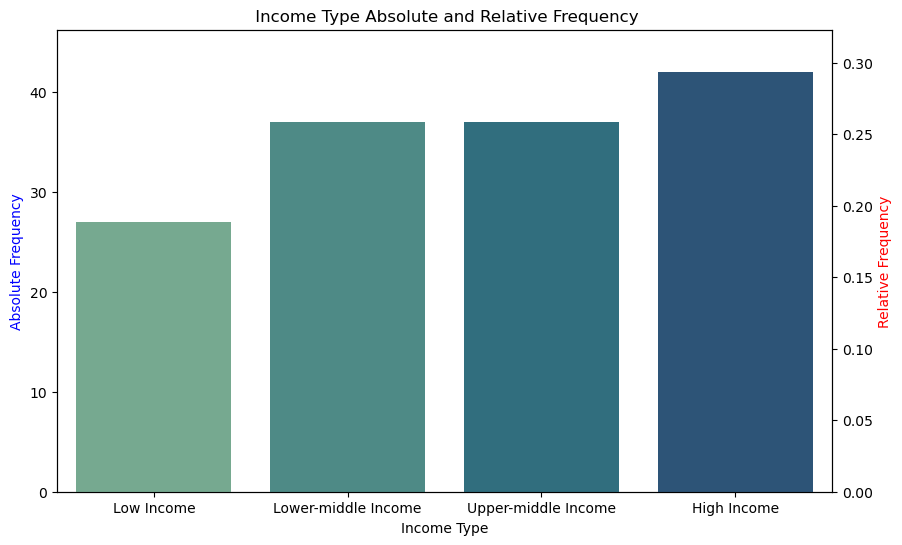

In [32]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot absolute frequency on the primary y-axis
sns.barplot(
    x='income_type', 
    y='absolute_frequency', 
    data=freq_df, 
    palette='crest', 
    ax=ax1
)
ax1.set_ylabel('Absolute Frequency', color='blue')
ax1.set_xlabel('Income Type')

# Create a second y-axis for relative frequency
ax2 = ax1.twinx()
sns.barplot(
    x='income_type', 
    y='relative_frequency', 
    data=freq_df, 
    palette='crest', 
    ax=ax2
)
ax2.set_ylabel('Relative Frequency', color='red')

# Optional: Adjust the limits, so both axes are nicely spaced
ax1.set_ylim(0, freq_df['absolute_frequency'].max() * 1.1)
ax2.set_ylim(0, freq_df['relative_frequency'].max() * 1.1)

# Add title
plt.title(' Income Type Absolute and Relative Frequency')

# Show the plot
plt.show()

In [33]:
# Frequency table
absolute_table_r = cat["region"].value_counts()
relative_table_r = cat["region"].value_counts(normalize=True)

freq_r_df = pd.concat([absolute_table_r, relative_table_r], axis=1)

# rename
freq_r_df.columns= ["absolute_frequency", "relative_frequency"]

# totals
total_absolute_r = absolute_table_r.sum()
total_relative_r = relative_table_r.sum()

# creating a dataframe from totals
total_row_r = pd.DataFrame({
    'absolute_frequency': [total_absolute_r],
    'relative_frequency': [total_relative_r]
}, index=['Total'])

# add everything into a single dataframe
freq_total_r_df = pd.concat([freq_r_df,total_row_r], axis=0)
round(freq_total_r_df,2)

,absolute_frequency,relative_frequency
Europe & Central Asia,41,0.29
Sub-Saharan Africa,40,0.28
Latin America & Caribbean,21,0.15
Middle East & North Africa,18,0.13
East Asia & Pacific,15,0.10
South Asia,6,0.04
North America,2,0.01
Total,143,1.00


#### Grouping by Variables: CO2 emissions and Income Type

In [34]:
# Group by
agg_income_df = df_merged.groupby("income_type")["co2_emissions"].agg(["mean","median","std"]).round(2)
agg_income_df

/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/3202860730.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_income_df = df_merged.groupby("income_type")["co2_emissions"].agg(["mean","median","std"]).round(2)


,mean,median,std
income_type,,,
Low Income,4243.85,2978.0,4842.83
Lower-middle Income,129549.11,21606.0,399567.07
Upper-middle Income,165579.51,41708.0,314393.11
High Income,528423.52,75494.0,1673581.40


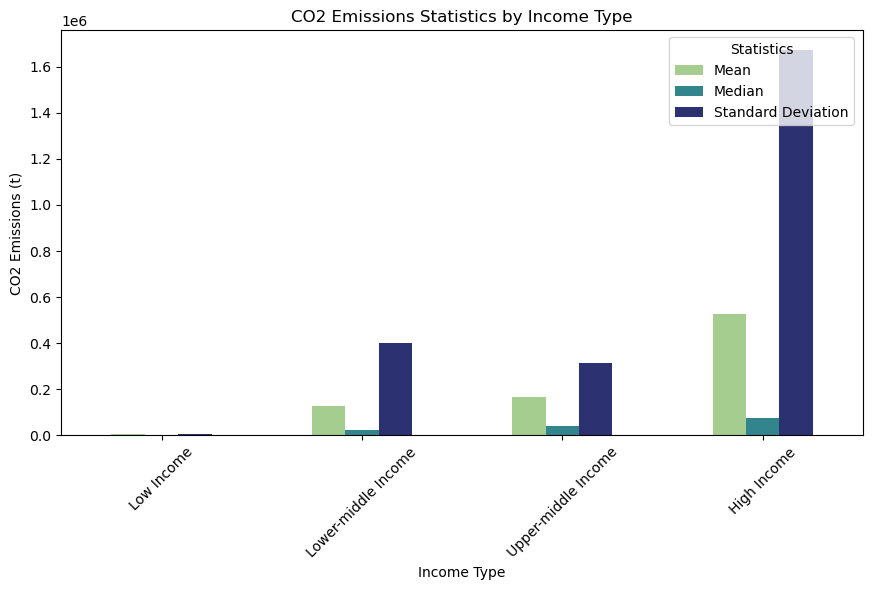

In [244]:
# Assuming agg_df is already computed with the statistics (count, mean, median, std)
agg_df_reset = agg_income_df.reset_index()

# Reshape the data to a format suitable for a stacked bar plot
agg_df_reset_melted = agg_df_reset.set_index('income_type')[['mean', 'median', 'std']]

# Plotting the stacked bar plot
ax = agg_df_reset_melted.plot(kind='bar', stacked=False, figsize=(9, 6), colormap="crest")

# Customize the plot
plt.title('CO2 Emissions Statistics by Income Type')
plt.xlabel('Income Type')
plt.ylabel('CO2 Emissions (t)')
plt.xticks(rotation=45)
plt.legend(title='Statistics', labels=['Mean', 'Median', 'Standard Deviation'], bbox_to_anchor=(0.75, 1), loc='upper left')

plt.tight_layout()
plt.show()

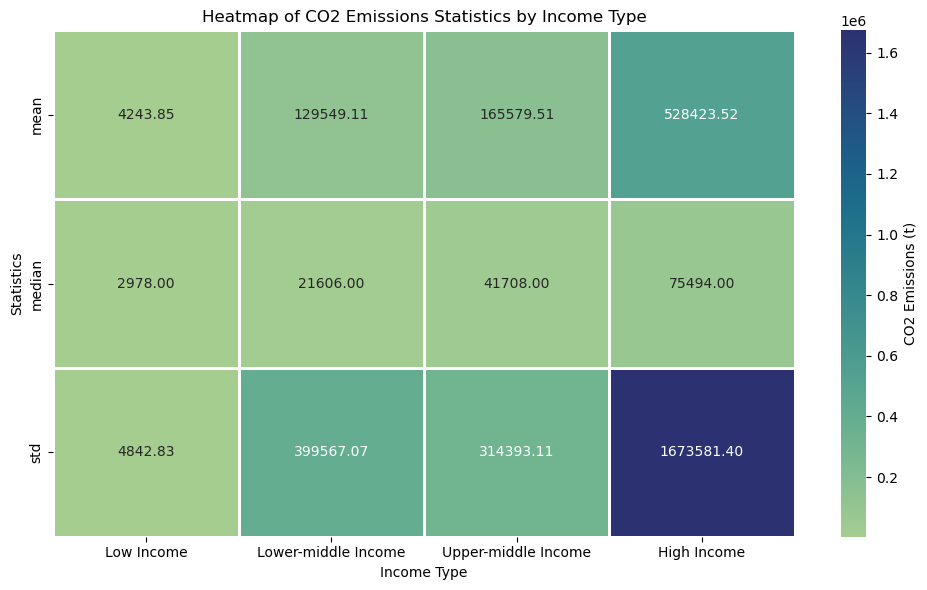

In [172]:
# Reshape data for heatmap
heatmap_data = agg_income_df.T  # Transpose the DataFrame to have statistics as columns

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='crest', fmt='.2f', cbar_kws={'label': 'CO2 Emissions (t)'}, linewidths=1)

# Customize plot
plt.title('Heatmap of CO2 Emissions Statistics by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Statistics')

plt.tight_layout()
plt.show()


#### CO2 Emissions by High Income Type Countries

In [159]:
# Create a dataframe only with high income type
high_income_df = df_merged[df_merged["income_type"]== 'High Income']
high_income_df.shape

(42, 24)

In [160]:
# I want to get only the top 10 countries with more CO2 emissions
top_10 = high_income_df.sort_values(by='co2_emissions', ascending=False).head(10)
top_10

,country,density_(p/km2),agricultural_land(%),land_area(km2),birth_rate,co2_emissions,fertility_rate,forested_area_(%),gdp($),gross_primary_education_enrollment_(%),gross_tertiary_education_enrollment_(%),infant_mortality,life_expectancy,maternal_mortality_ratio,out_of_pocket_health_expenditure(%),population,population:_labor_force_participation_(%),unemployment_rate(%),urban_population,latitude,longitude,gdp_per_capita,income_type,region
28,China,153,56.2,9596960,10.9,9893038,1.69,22.4,19910000000000,100.2,50.6,7.4,77.0,29.0,32.4,1397715000,68.0,4.32,842933962,35.861660,104.195397,14244.677921,High Income,East Asia & Pacific
135,United States,36,44.4,9833517,11.6,5006302,1.73,33.9,21427700000000,101.8,88.2,5.6,78.5,19.0,11.1,328239523,62.0,14.70,270663028,37.090240,-95.712891,65280.682241,High Income,North America
65,Japan,347,12.3,377944,7.4,1135886,1.42,68.5,5081769542380,98.8,63.2,1.8,84.2,5.0,13.1,126226568,61.7,2.29,115782416,36.204824,138.252924,40259.112031,High Income,East Asia & Pacific
48,Germany,240,47.7,357022,9.5,727973,1.56,32.7,3845630030824,104.0,70.2,3.1,80.9,7.0,12.5,83132799,60.8,3.04,64324835,51.165691,10.451526,46258.878290,High Income,Europe & Central Asia
117,South Korea,527,17.4,99720,6.4,620302,0.98,63.4,2029000000000,98.1,94.3,2.7,82.6,11.0,36.8,51709098,63.0,4.15,42106719,35.907757,127.766922,39238.742861,High Income,East Asia & Pacific
109,Saudi Arabia,16,80.8,2149690,17.8,563449,2.32,0.5,792966838162,99.8,68.0,6.0,75.0,17.0,15.0,34268528,55.9,5.93,28807838,23.885942,45.079162,23139.798656,High Income,Middle East & North Africa
24,Canada,4,6.9,9984670,10.1,544894,1.50,38.2,1736425629520,100.9,68.9,4.3,81.9,10.0,14.6,36991981,65.1,5.56,30628482,56.130366,-106.346771,46940.595842,High Income,North America
134,United Kingdom,281,71.7,243610,11.0,379025,1.68,13.1,2827113184696,101.2,60.0,3.6,81.3,7.0,14.8,66834405,62.8,3.85,55908316,55.378051,-3.435973,42300.267126,High Income,Europe & Central Asia
6,Australia,3,48.2,7741220,12.6,375908,1.74,16.3,1392680589329,100.3,113.1,3.1,82.7,6.0,19.6,25766605,65.5,5.27,21844756,-25.274398,133.775136,54049.828812,High Income,East Asia & Pacific
63,Italy,206,43.2,301340,7.3,320411,1.29,31.8,2001244392042,101.9,61.9,2.6,82.9,2.0,22.8,60297396,49.6,9.89,42651966,41.871940,12.567380,33189.565799,High Income,Europe & Central Asia


/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/3955699299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x="country", y="co2_emissions", palette="coolwarm")


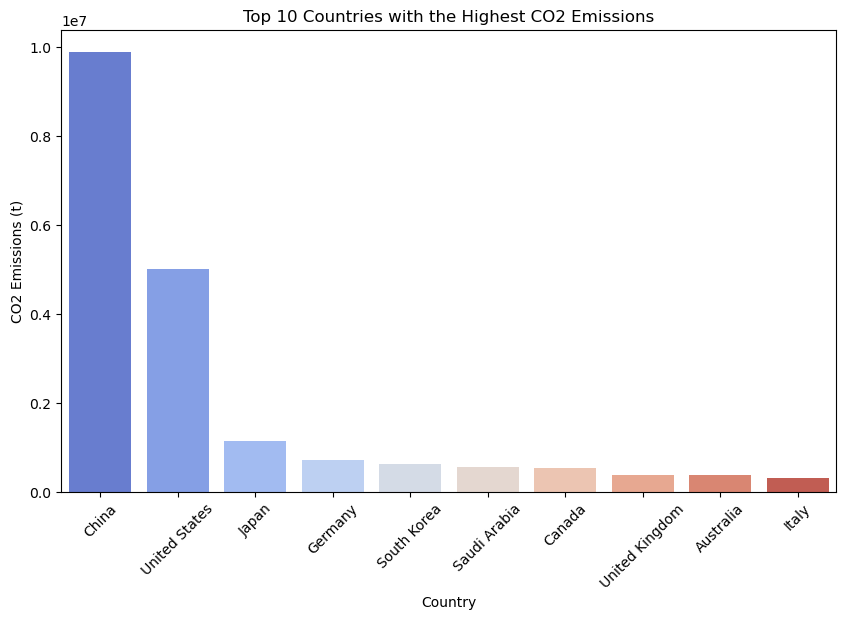

In [173]:
# Plotting a bar plot to visualize the average 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x="country", y="co2_emissions", palette="coolwarm")

# Add titles and labels
plt.title('Top 10 Countries with the Highest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (t)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

#### Grouping by Variables: CO2 emissions and Region

In [37]:
# Group by
agg_region_df = df_merged.groupby("region")["co2_emissions"].agg(["count","mean","median","std"]).round(2)
agg_region_df

,count,mean,median,std
region,,,,
East Asia & Pacific,15,905032.40,192668.0,2505962.50
Europe & Central Asia,41,150648.73,45871.0,292670.47
Latin America & Caribbean,21,83573.62,21606.0,140672.44
Middle East & North Africa,18,144641.11,64311.5,184063.10
North America,2,2775598.00,2775598.0,3154691.85
South Asia,6,455701.17,53804.0,959079.32
Sub-Saharan Africa,40,20801.45,3661.5,76407.36


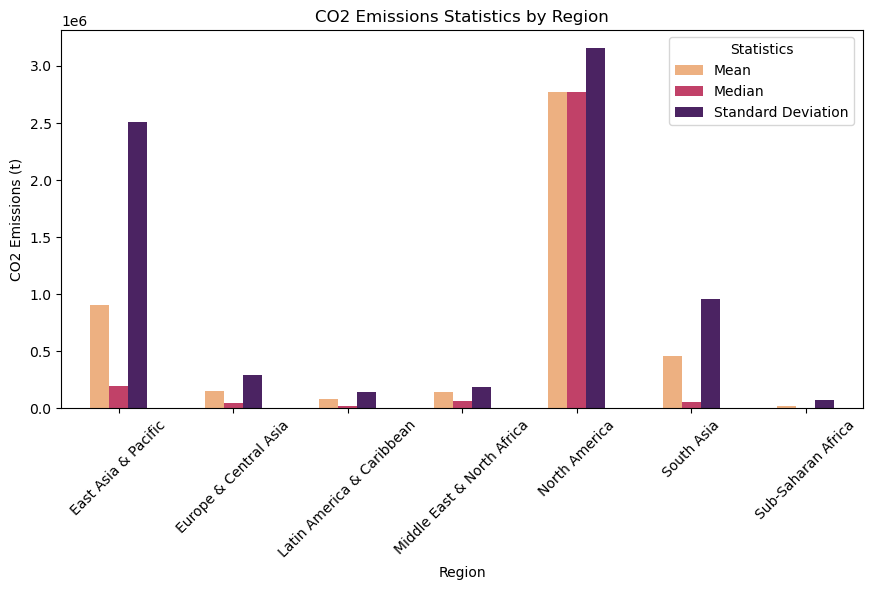

In [242]:
agg_region_wocount_df = df_merged.groupby("region")["co2_emissions"].agg(["mean","median","std"]).round(2)

# Reset the index to turn the 'region' into a column (so we can plot it easily)
agg_df_reset = agg_region_wocount_df.reset_index()

# Set 'region' as index and select only the statistics columns for stacking
agg_df_reset = agg_df_reset.set_index('region')[['mean', 'median', 'std']]

# Plot the stacked bar plot
ax = agg_df_reset.plot(kind='bar', stacked=False, figsize=(9, 6), colormap='flare')

# Customize the plot
plt.title('CO2 Emissions Statistics by Region')
plt.xlabel('Region')
plt.ylabel('CO2 Emissions (t)')
plt.xticks(rotation=45)
plt.legend(title='Statistics', labels=['Mean', 'Median', 'Standard Deviation'], bbox_to_anchor=(0.75, 1), loc='upper left')

plt.tight_layout()
plt.show()

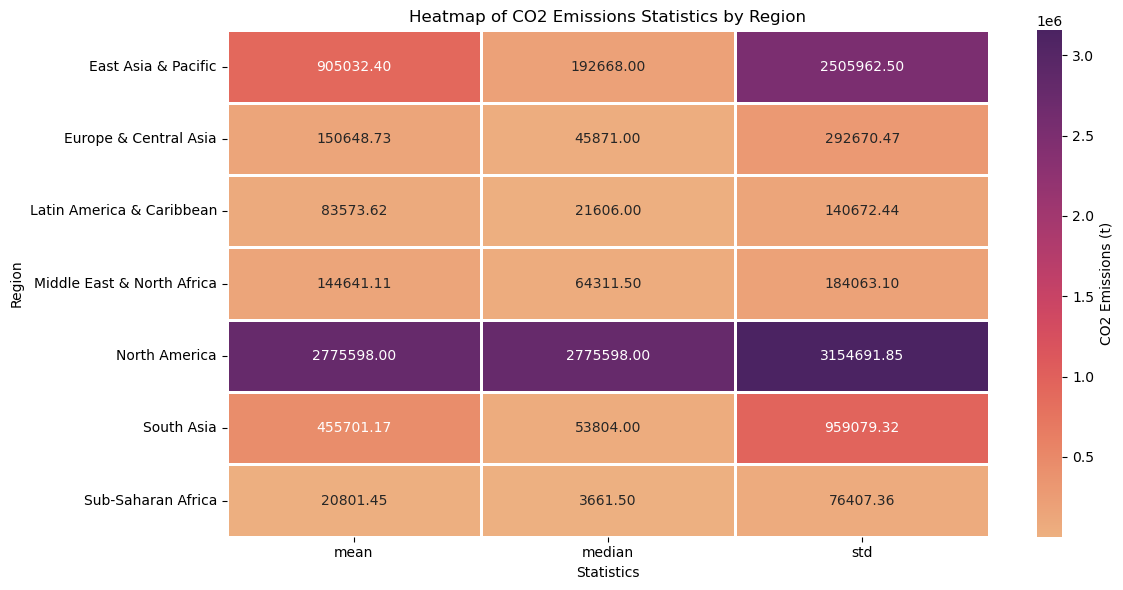

In [175]:
# Reset the index to turn 'region' into a column
agg_df_reset = agg_region_wocount_df.reset_index()

# Set 'region' as index and keep the statistics columns
agg_df_reset = agg_df_reset.set_index('region')[['mean', 'median', 'std']]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(agg_df_reset, annot=True, cmap='flare', fmt='.2f', cbar_kws={'label': 'CO2 Emissions (t)'}, linewidths=1)

# Customize the plot
plt.title('Heatmap of CO2 Emissions Statistics by Region')
plt.xlabel('Statistics')
plt.ylabel('Region')

plt.tight_layout()
plt.show()


In [40]:
# Group by
df_merged.groupby(["income_type","region"])["co2_emissions"].agg(['mean','median','count','std']).round(2)


/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/2701935964.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby(["income_type","region"])["co2_emissions"].agg(['mean','median','count','std']).round(2)


mean     median  count  \
income_type         region                                                     
Low Income          East Asia & Pacific                NaN        NaN      0   
                    Europe & Central Asia          5310.00     5310.0      1   
                    Latin America & Caribbean      2978.00     2978.0      1   
                    Middle East & North Africa    10609.00    10609.0      1   
                    North America                      NaN        NaN      0   
                    South Asia                     8888.50     8888.5      2   
                    Sub-Saharan Africa             3541.36     1701.5     22   
Lower-middle Income East Asia & Pacific          153502.50    73783.5      6   
                    Europe & Central Asia         85367.00    64715.5      4   
                    Latin America & Caribbean     11045.00     8491.0      4   
                    Middle East & North Africa   101721.80    61276.0      5   
                    North America                      NaN        NaN      0   
                    South Asia                   679107.50   142698.0      4   
                    Sub-Saharan Africa            18686.79    10288.0     14   
Upper-middle Income East Asia & Pacific          185806.67   248289.0      3   
                    Europe & Central Asia        206449.23    45221.0     13   
                    Latin America & Caribbean    120034.17    34719.5     12   
                    Middle East & North Africa   190447.80    50564.0      5   
                    North America                      NaN        NaN      0   
                    South Asia                         NaN        NaN      0   
                    Sub-Saharan Africa           123133.25     5830.5      4   
High Income         East Asia & Pacific         2016175.17   498105.0      6   
                    Europe & Central Asia        136781.74    48742.0     23   
                    Latin America & Caribbean     66869.50    48268.5      4   
                    Middle East & North Africa   161726.14    98734.0      7   
                    North America               2775598.00  2775598.0      2   
                    South Asia                         NaN        NaN      0   
                    Sub-Saharan Africa                 NaN        NaN      0   

                                                       std  
income_type         region                                  
Low Income          East Asia & Pacific                NaN  
                    Europe & Central Asia              NaN  
                    Latin America & Caribbean          NaN  
                    Middle East & North Africa         NaN  
                    North America                      NaN  
                    South Asia                      306.18  
                    Sub-Saharan Africa             4939.78  
Lower-middle Income East Asia & Pacific          213928.15  
                    Europe & Central Asia         85039.74  
                    Latin America & Caribbean      7252.84  
                    Middle East & North Africa    91046.95  
                    North America                      NaN  
                    South Asia                  1154735.32  
                    Sub-Saharan Africa            30433.19  
Upper-middle Income East Asia & Pacific          140071.50  
                    Europe & Central Asia        471124.17  
                    Latin America & Caribbean    174360.58  
                    Middle East & North Africa   272228.51  
                    North America                      NaN  
                    South Asia                         NaN  
                    Sub-Saharan Africa           235675.41  
High Income         East Asia & Pacific         3880756.02  
                    Europe & Central Asia        172939.58  
                    Latin America & Caribbean     74371.40  
                    Middle East & North Africa   185582.72  
      

In [41]:
df_merged[df_merged["country"] == "China"]

,country,density_(p/km2),agricultural_land(%),land_area(km2),birth_rate,co2_emissions,fertility_rate,forested_area_(%),gdp($),gross_primary_education_enrollment_(%),gross_tertiary_education_enrollment_(%),infant_mortality,life_expectancy,maternal_mortality_ratio,out_of_pocket_health_expenditure(%),population,population:_labor_force_participation_(%),unemployment_rate(%),urban_population,latitude,longitude,gdp_per_capita,income_type,region
28,China,153,56.2,9596960,10.9,9893038,1.69,22.4,19910000000000,100.2,50.6,7.4,77.0,29.0,32.4,1397715000,68.0,4.32,842933962,35.86166,104.195397,14244.677921,High Income,East Asia & Pacific


In [42]:
df_merged[df_merged["country"] == "United States"]

,country,density_(p/km2),agricultural_land(%),land_area(km2),birth_rate,co2_emissions,fertility_rate,forested_area_(%),gdp($),gross_primary_education_enrollment_(%),gross_tertiary_education_enrollment_(%),infant_mortality,life_expectancy,maternal_mortality_ratio,out_of_pocket_health_expenditure(%),population,population:_labor_force_participation_(%),unemployment_rate(%),urban_population,latitude,longitude,gdp_per_capita,income_type,region
135,United States,36,44.4,9833517,11.6,5006302,1.73,33.9,21427700000000,101.8,88.2,5.6,78.5,19.0,11.1,328239523,62.0,14.7,270663028,37.09024,-95.712891,65280.682241,High Income,North America


#### Group by Forested Area and Income Type

In [43]:
df_merged.groupby(["income_type"])["forested_area_(%)"].agg(['mean','median','count','std']).round(2)

/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/170314460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby(["income_type"])["forested_area_(%)"].agg(['mean','median','count','std']).round(2)


,mean,median,count,std
income_type,,,,
Low Income,21.75,14.90,27,20.28
Lower-middle Income,27.95,27.80,37,21.50
Upper-middle Income,29.67,31.10,37,21.53
High Income,30.17,31.75,42,20.53


/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/181921205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income_type', y='forested_area_(%)', data=df_merged, palette='crest')


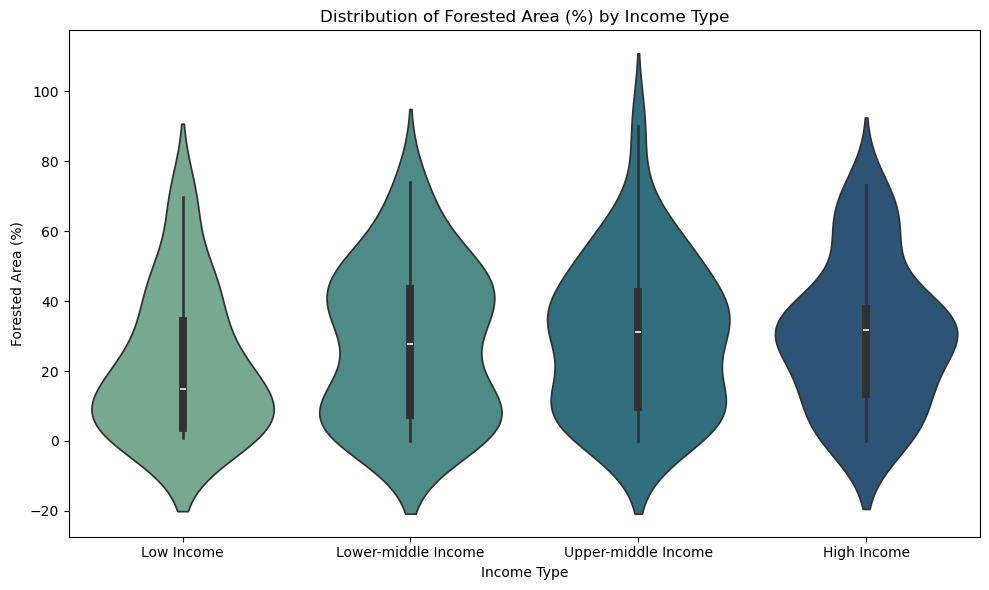

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='income_type', y='forested_area_(%)', data=df_merged, palette='crest')
plt.title('Distribution of Forested Area (%) by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Forested Area (%)')
plt.tight_layout()
plt.show()

#### Group by Agricultural Land and Income Type

In [45]:
df_merged.groupby(["income_type"])["agricultural_land(%)"].agg(['mean','median','count','std']).round(2)

/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/1532350976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby(["income_type"])["agricultural_land(%)"].agg(['mean','median','count','std']).round(2)


,mean,median,count,std
income_type,,,,
Low Income,50.62,58.00,27,19.98
Lower-middle Income,46.52,44.80,37,20.38
Upper-middle Income,43.86,43.10,37,18.98
High Income,35.26,38.95,42,22.22


/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_3903/3894774250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income_type', y='agricultural_land(%)', data=df_merged, palette='flare')


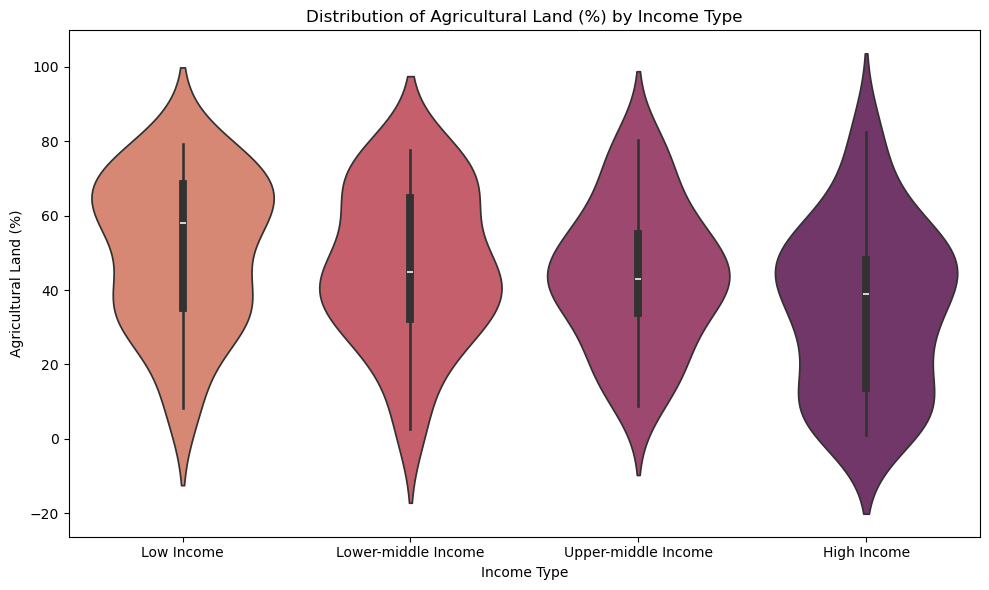

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='income_type', y='agricultural_land(%)', data=df_merged, palette='flare')
plt.title('Distribution of Agricultural Land (%) by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Agricultural Land (%)')
plt.tight_layout()
plt.show()

#### Summary Statistics


In [196]:
num_2 = num[["agricultural_land(%)","co2_emissions", "forested_area_(%)", "population", "density_(p/km2)", "gdp_per_capita", "gdp($)"]]
num_2.describe().round(2)

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
count,143.00,143.00,143.00,1.430000e+02,143.00,143.00,1.430000e+02
mean,43.30,232364.55,27.88,5.290520e+07,197.89,13791.34,6.406917e+11
std,21.08,956022.09,21.01,1.670524e+08,727.00,18975.87,2.505160e+12
min,0.90,293.00,0.00,1.501635e+06,2.00,261.25,1.340389e+09
25%,29.65,7288.00,9.25,6.393344e+06,31.00,1480.95,1.900182e+10
50%,43.70,28830.00,28.10,1.464547e+07,81.00,5352.86,6.680080e+10
75%,58.95,111814.00,42.15,3.867577e+07,138.00,15960.57,3.580666e+11
max,82.60,9893038.00,90.00,1.397715e+09,8358.00,81993.73,2.142770e+13


<h2 style="color: #008080;">Statistical Analysis</h2>

In [79]:
crosstab_result = pd.crosstab(df_merged['income_type'], df_merged['region'])
crosstab_result

region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
income_type,,,,,,,
Low Income,0,1,1,1,0,2,22
Lower-middle Income,6,4,4,5,0,4,14
Upper-middle Income,3,13,12,5,0,0,4
High Income,6,23,4,7,2,0,0


In [224]:
crosstab_result.columns

Index(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'],
      dtype='object', name='region')

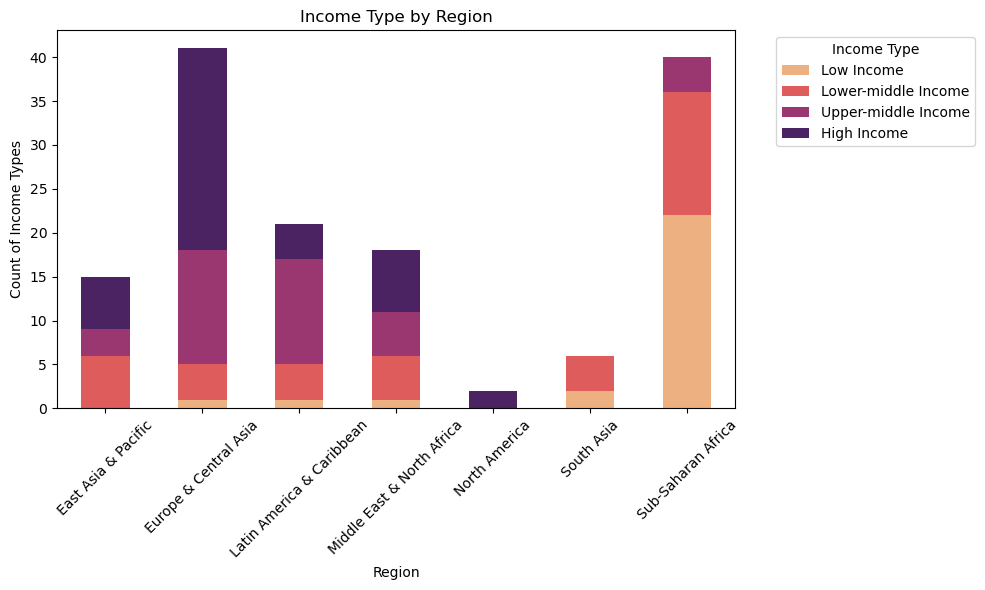

In [230]:
# Reset the index to turn the 'region' into a column (so we can plot it easily)
agg_df_reset = crosstab_result.reset_index()

# Set 'region' as index and select only the statistics columns for stacking
ax = agg_df_reset.set_index('income_type').T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='flare')

# Customize the plot
plt.title('Income Type by Region')
plt.xlabel('Region')
plt.ylabel('Count of Income Types')
plt.xticks(rotation=45)
plt.legend(title='Income Type', labels=['Low Income', 'Lower-middle Income', 'Upper-middle Income','High Income'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [57]:
# Chi-square
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)
chi2_pvalue

1.1547708515954836e-12

In [58]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method='cramer')

0.47322484625547634

In [59]:
# However p-value is very low, there is no perfect association between the region and the income type

#### Correlation Heatmap

In [197]:
# correlation between numerical continuous variables
correlation_matrix = num_2.corr()
correlation_matrix

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
agricultural_land(%),1.000000,0.026903,-0.350978,0.079621,-0.148309,-0.266511,0.011485
co2_emissions,0.026903,1.000000,0.011684,0.807094,-0.011377,0.139771,0.915680
forested_area_(%),-0.350978,0.011684,1.000000,-0.012027,-0.070983,0.060588,0.049552
population,0.079621,0.807094,-0.012027,1.000000,0.012561,-0.028255,0.625195
density_(p/km2),-0.148309,-0.011377,-0.070983,0.012561,1.000000,0.245054,-0.004847
gdp_per_capita,-0.266511,0.139771,0.060588,-0.028255,0.245054,1.000000,0.282790
gdp($),0.011485,0.915680,0.049552,0.625195,-0.004847,0.282790,1.000000


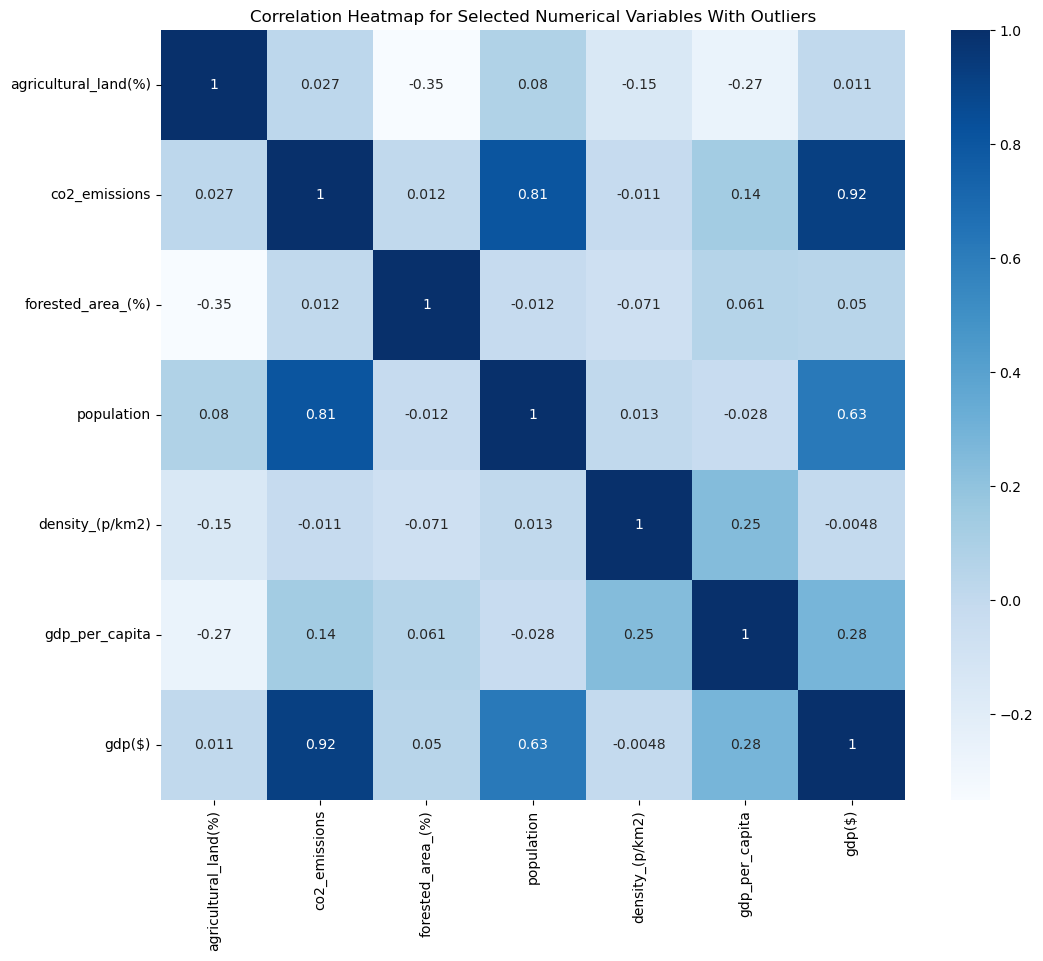

In [198]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 10))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")

plt.title("Correlation Heatmap for Selected Numerical Variables With Outliers")
plt.show()

In [199]:
# Without outliers
no_outliers_corr = data_cleaning.remove_outliers(num_2,"co2_emissions")

In [200]:
# correlation between numerical continuous variables
correlation_matrix_no = no_outliers_corr.corr()
correlation_matrix_no

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
agricultural_land(%),1.000000,-0.116288,-0.296982,0.080147,-0.157153,-0.299938,-0.131704
co2_emissions,-0.116288,1.000000,-0.154041,0.425808,0.008006,0.213283,0.662293
forested_area_(%),-0.296982,-0.154041,1.000000,-0.130763,-0.083006,0.031500,0.027252
population,0.080147,0.425808,-0.130763,1.000000,0.015500,-0.218737,0.258100
density_(p/km2),-0.157153,0.008006,-0.083006,0.015500,1.000000,0.282321,0.131906
gdp_per_capita,-0.299938,0.213283,0.031500,-0.218737,0.282321,1.000000,0.621865
gdp($),-0.131704,0.662293,0.027252,0.258100,0.131906,0.621865,1.000000


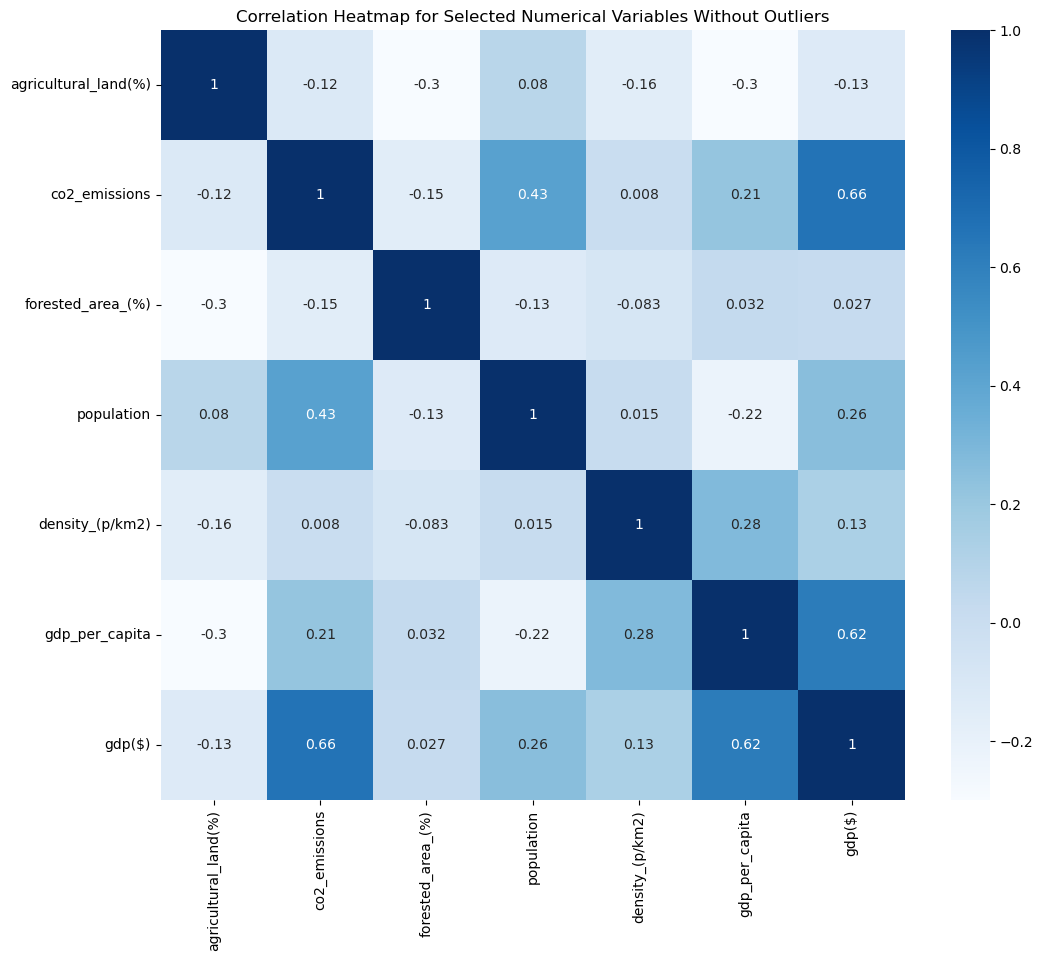

In [201]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 10))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_no, annot=True, cmap="Blues")

plt.title("Correlation Heatmap for Selected Numerical Variables Without Outliers")
plt.show()

#### Correlation between Forested Area and GDP per capita

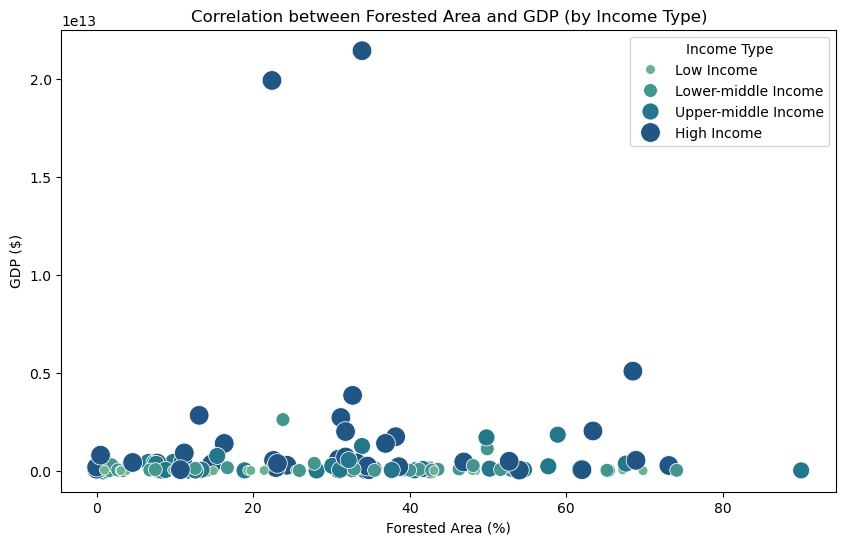

In [202]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='forested_area_(%)', y='gdp($)', hue='income_type', palette='crest', size='income_type', sizes=(200, 50))
plt.title('Correlation between Forested Area and GDP (by Income Type)')
plt.xlabel('Forested Area (%)')
plt.ylabel('GDP ($)')
plt.legend(title='Income Type')
plt.show()

In [203]:
# Calculating the Pearson correlation coefficient between 'forested_area_(%)' and 'gdp($)' columns
df_merged['forested_area_(%)'].corr(df_merged['gdp($)'])

0.04955233857937956

#### Correlation between Population Density and CO2 emissions

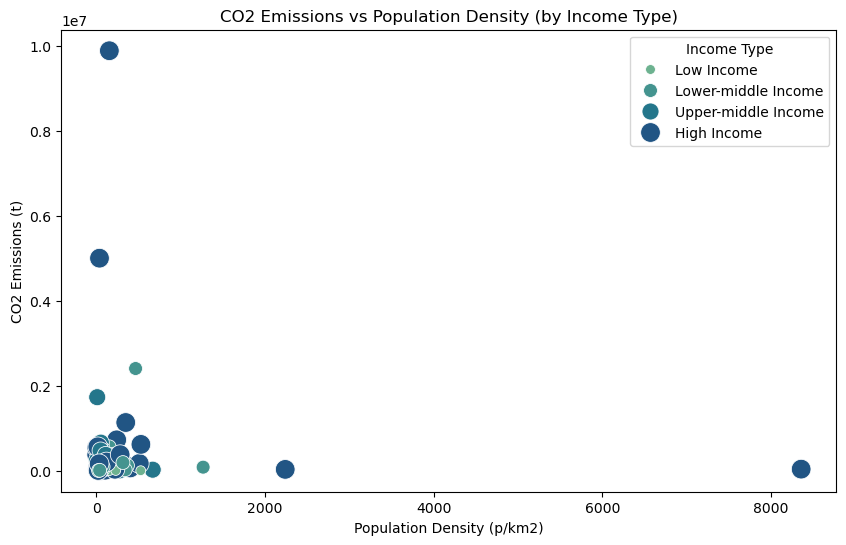

In [176]:
# Scatter plot between CO2 emissions and population density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='density_(p/km2)', y='co2_emissions', hue='income_type', palette='crest', size='income_type', sizes=(200, 50))
plt.title('CO2 Emissions vs Population Density (by Income Type)')
plt.xlabel('Population Density (p/km2)')
plt.ylabel('CO2 Emissions (t)')
plt.legend(title='Income Type')
plt.show()

In [ ]:
# Remove outliers for the correlation --> density_(p/km2)
no_outliers = data_cleaning.remove_outliers(df_merged,"density_(p/km2)")
no_outliers.shape

(126, 24)

In [ ]:
# Remove outliers for the correlation --> co2_emissions
no_outliers = data_cleaning.remove_outliers(df_merged,"co2_emissions")
no_outliers.shape

(122, 24)

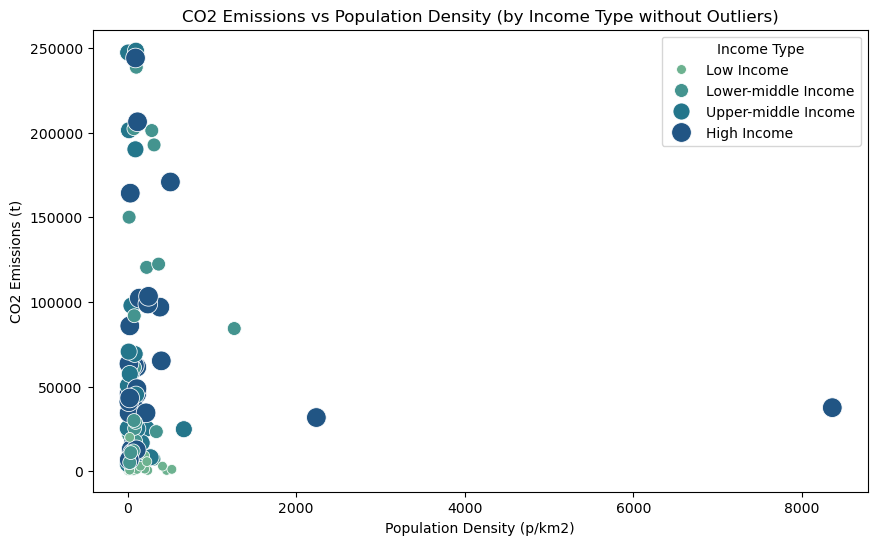

In [177]:
# Scatter plot between CO2 emissions and population density without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_outliers, x='density_(p/km2)', y='co2_emissions', hue='income_type', palette='crest', size='income_type', sizes=(200, 50))
plt.title('CO2 Emissions vs Population Density (by Income Type without Outliers)')
plt.xlabel('Population Density (p/km2)')
plt.ylabel('CO2 Emissions (t)')
plt.legend(title='Income Type')
plt.show()

In [120]:
# Calculating the Pearson correlation coefficient between 'density_(p/km2)' and 'co2_emissions' columns
no_outliers['density_(p/km2)'].corr(no_outliers['co2_emissions']) 

0.008006137025444802

#### Correlation between population and CO2 emissions

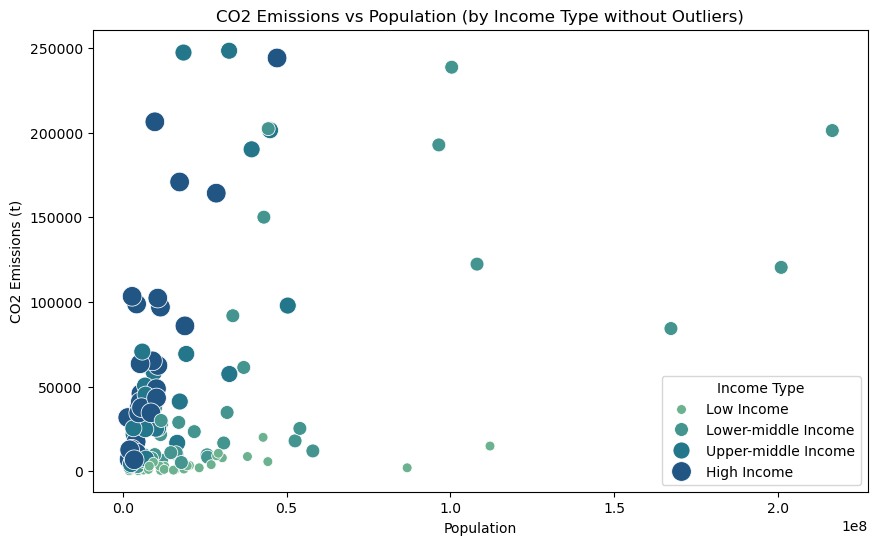

In [178]:
# Scatter plot between CO2 emissions and population density without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_outliers, x='population', y='co2_emissions', hue='income_type', palette='crest', size='income_type', sizes=(200, 50))
plt.title('CO2 Emissions vs Population (by Income Type without Outliers)')
plt.xlabel('Population')
plt.ylabel('CO2 Emissions (t)')
plt.legend(title='Income Type')
plt.show()

In [122]:
# Calculating the Pearson correlation coefficient between 'population' and 'co2_emissions' columns
no_outliers['population'].corr(no_outliers['co2_emissions']) 

0.42580778476221903

#### Correlation between Agricultural Land (%) and CO2 emissions

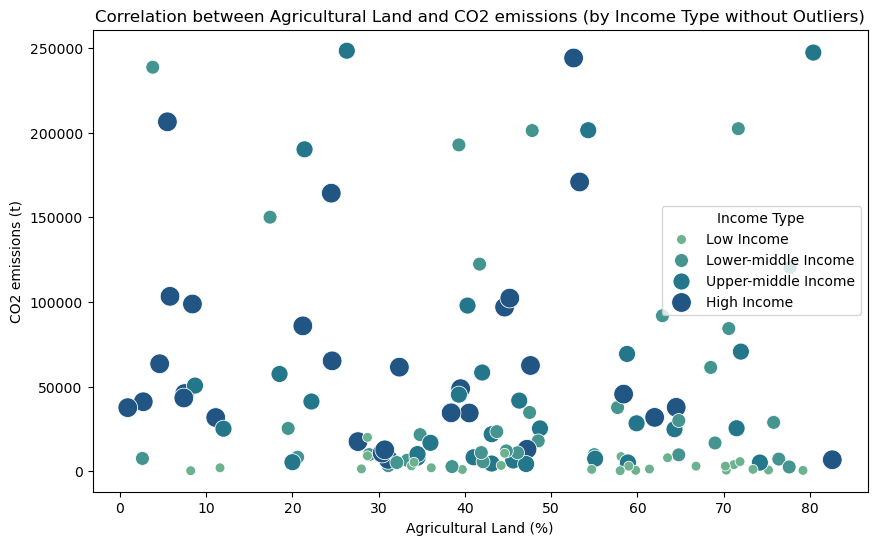

In [179]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_outliers, x='agricultural_land(%)', y='co2_emissions', hue='income_type', palette='crest', size='income_type', sizes=(200, 50))
plt.title('Correlation between Agricultural Land and CO2 emissions (by Income Type without Outliers)')
plt.xlabel('Agricultural Land (%)')
plt.ylabel('CO2 emissions (t)')
plt.legend(title='Income Type')
plt.show()

In [125]:
# Calculating the Pearson correlation coefficient between 'agricultural_land(%)' and 'co2_emissions' columns
no_outliers['agricultural_land(%)'].corr(no_outliers['co2_emissions']) 

-0.11628802086923008

#### Correlation between GDP per capita and CO2 emissions

In [204]:
no_outliers = data_cleaning.remove_outliers(df_merged,"gdp($)")
no_outliers = data_cleaning.remove_outliers(df_merged,"co2_emissions")
no_outliers.shape

(122, 24)

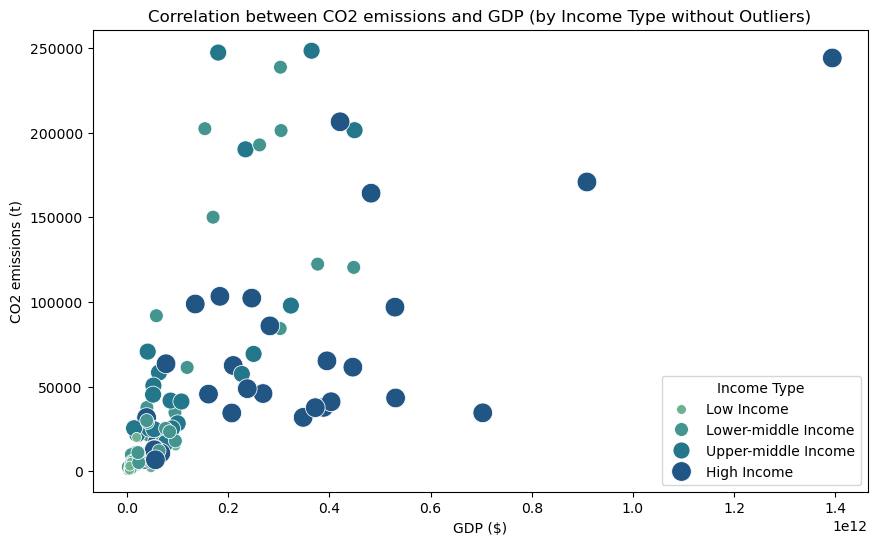

In [221]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_outliers, x='gdp($)', y='co2_emissions', hue='income_type', palette='crest', size='income_type', sizes=(200, 50))
plt.title('Correlation between CO2 emissions and GDP (by Income Type without Outliers)')
plt.xlabel('GDP ($)')
plt.ylabel('CO2 emissions (t)')
plt.legend(title='Income Type')
plt.show()

In [194]:
# Calculating the Pearson correlation coefficient between 'gdp_per_capita' and 'co2_emissions' columns
no_outliers['gdp($)'].corr(no_outliers['co2_emissions']) 

0.6622928012494239

<Figure size 1000x600 with 0 Axes>

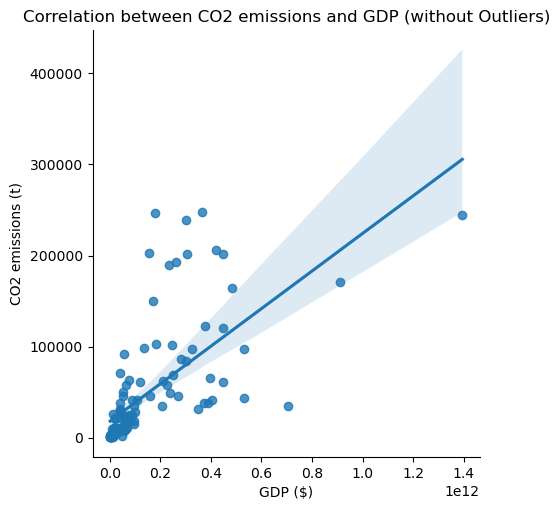

In [222]:
plt.figure(figsize=(10, 6))

sns.lmplot(data=no_outliers,
            x='gdp($)',
            y='co2_emissions')

plt.title('Correlation between CO2 emissions and GDP (without Outliers)')
plt.xlabel('GDP ($)')
plt.ylabel('CO2 emissions (t)')

plt.show()

#### Filter by High Income

In [139]:
high_income_df = df_merged[df_merged["income_type"]== 'High Income']

In [206]:
num_3 = high_income_df[["agricultural_land(%)","co2_emissions", "forested_area_(%)", "population", "density_(p/km2)", "gdp_per_capita", "gdp($)"]]
num_3.describe().round(2)

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
count,42.00,42.00,42.00,4.200000e+01,42.00,42.00,4.200000e+01
mean,35.26,528423.52,30.17,6.171833e+07,383.24,37866.02,1.763051e+12
std,22.22,1673581.40,20.53,2.180349e+08,1308.49,19489.33,4.419095e+12
min,0.90,6766.00,0.00,1.501635e+06,3.00,14244.68,3.411720e+10
25%,13.58,37579.00,13.50,5.071936e+06,30.50,19487.22,1.893318e+11
50%,38.95,75494.00,31.75,1.001997e+07,108.00,39748.93,3.992175e+11
75%,48.08,302216.25,37.88,3.631112e+07,234.75,49879.42,1.271778e+12
max,82.60,9893038.00,73.10,1.397715e+09,8358.00,81993.73,2.142770e+13


In [207]:
# correlation between numerical continuous variables
correlation_matrix_hi = num_3.corr()
correlation_matrix_hi

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
agricultural_land(%),1.000000,0.167359,-0.242086,0.175557,-0.280685,-0.160520,0.168592
co2_emissions,0.167359,1.000000,-0.017654,0.968768,-0.055244,-0.066851,0.925348
forested_area_(%),-0.242086,-0.017654,1.000000,-0.024201,-0.118559,-0.069206,0.033602
population,0.175557,0.968768,-0.024201,1.000000,-0.046625,-0.138368,0.813871
density_(p/km2),-0.280685,-0.055244,-0.118559,-0.046625,1.000000,0.211398,-0.060981
gdp_per_capita,-0.160520,-0.066851,-0.069206,-0.138368,0.211398,1.000000,0.073455
gdp($),0.168592,0.925348,0.033602,0.813871,-0.060981,0.073455,1.000000


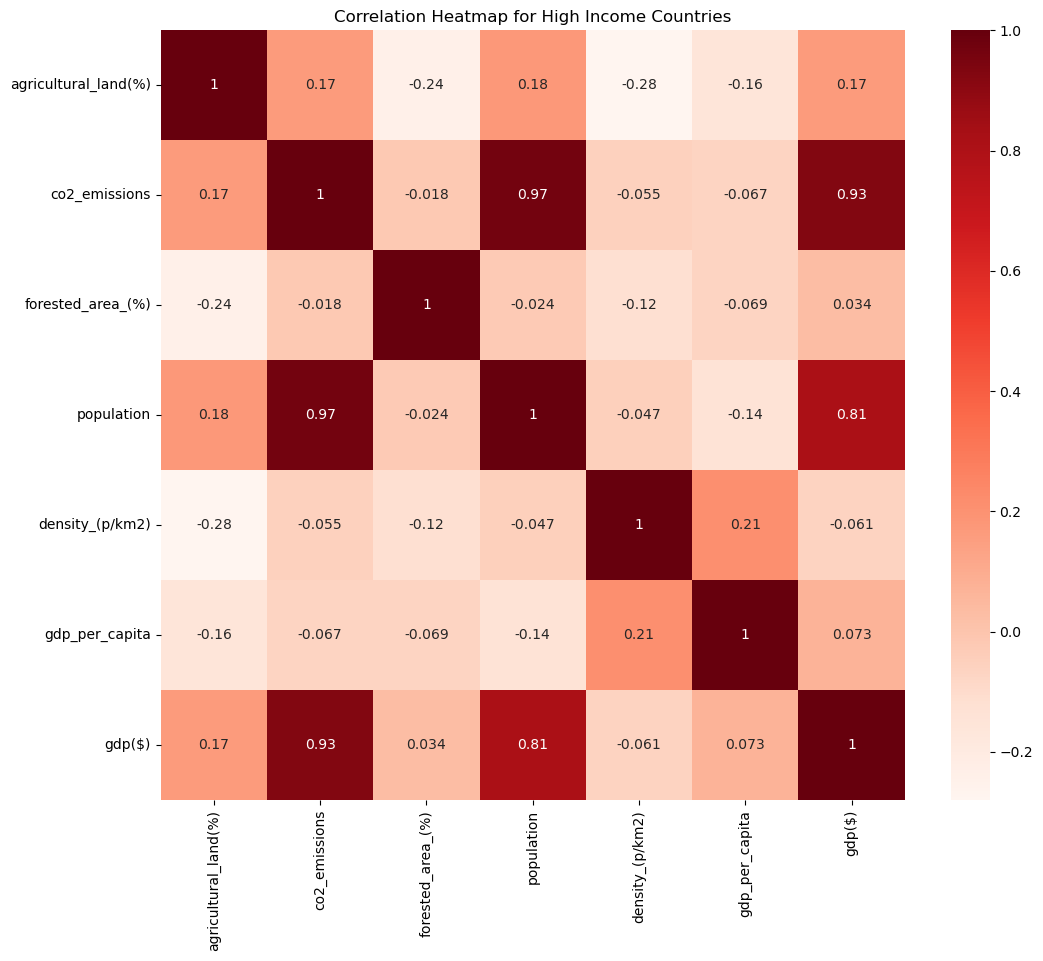

In [208]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 10))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_hi, annot=True, cmap="Reds")

plt.title("Correlation Heatmap for High Income Countries")
plt.show()

In [209]:
# WITHOUT OUTLIERS
no_outliers_corr_hi = data_cleaning.remove_outliers(num_3,"co2_emissions")

In [210]:
# correlation between numerical continuous variables
correlation_matrix_no_hi = no_outliers_corr_hi.corr()
correlation_matrix_no_hi

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
agricultural_land(%),1.000000,0.157279,-0.206555,0.299108,-0.281847,-0.162104,0.237297
co2_emissions,0.157279,1.000000,-0.053795,0.800904,-0.106681,0.002452,0.767723
forested_area_(%),-0.206555,-0.053795,1.000000,0.053204,-0.122689,-0.103772,0.032248
population,0.299108,0.800904,0.053204,1.000000,-0.109068,-0.060422,0.932368
density_(p/km2),-0.281847,-0.106681,-0.122689,-0.109068,1.000000,0.227539,-0.057801
gdp_per_capita,-0.162104,0.002452,-0.103772,-0.060422,0.227539,1.000000,0.199979
gdp($),0.237297,0.767723,0.032248,0.932368,-0.057801,0.199979,1.000000


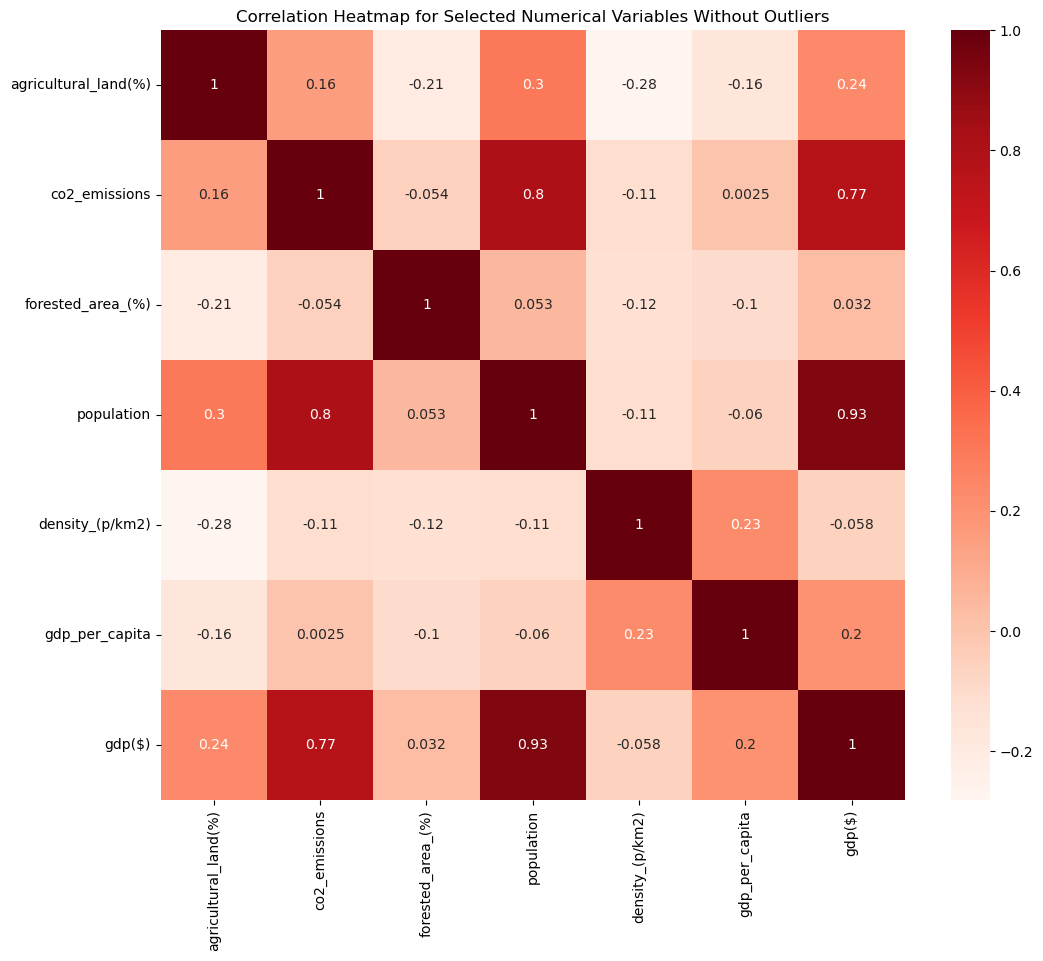

In [211]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 10))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_no_hi, annot=True, cmap="Reds")

plt.title("Correlation Heatmap for Selected Numerical Variables Without Outliers")
plt.show()

#### Filter by Low Income

In [140]:
low_income_df = df_merged[df_merged["income_type"]== 'Low Income']

In [212]:
num_4 = low_income_df[["agricultural_land(%)","co2_emissions", "forested_area_(%)", "population", "density_(p/km2)", "gdp_per_capita", "gdp($)"]]
num_4.describe().round(2)

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
count,27.00,27.00,27.00,2.700000e+01,27.00,27.00,2.700000e+01
mean,50.62,4243.85,21.75,2.392968e+07,124.44,650.94,1.612891e+10
std,19.98,4842.83,20.28,2.501225e+07,141.48,220.90,1.948894e+10
min,8.20,293.00,0.90,1.920922e+06,8.00,261.25,1.340389e+09
25%,35.10,1054.50,3.80,8.701692e+06,37.50,496.96,4.331101e+09
50%,58.00,2978.00,14.90,1.594688e+07,60.00,675.54,1.131495e+10
75%,68.50,5495.00,34.40,2.888532e+07,177.50,789.21,1.820621e+10
max,79.20,20000.00,69.80,1.120787e+08,525.00,1071.05,9.610766e+10


In [213]:
# correlation between numerical continuous variables
correlation_matrix_lo = num_4.corr()
correlation_matrix_lo

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
agricultural_land(%),1.000000,-0.256545,-0.179104,-0.323833,0.496036,-0.229027,-0.313601
co2_emissions,-0.256545,1.000000,-0.305775,0.594337,-0.177495,0.212086,0.596658
forested_area_(%),-0.179104,-0.305775,1.000000,0.000329,-0.086517,-0.111925,-0.074862
population,-0.323833,0.594337,0.000329,1.000000,-0.137516,0.103764,0.946840
density_(p/km2),0.496036,-0.177495,-0.086517,-0.137516,1.000000,0.069120,-0.078912
gdp_per_capita,-0.229027,0.212086,-0.111925,0.103764,0.069120,1.000000,0.337190
gdp($),-0.313601,0.596658,-0.074862,0.946840,-0.078912,0.337190,1.000000


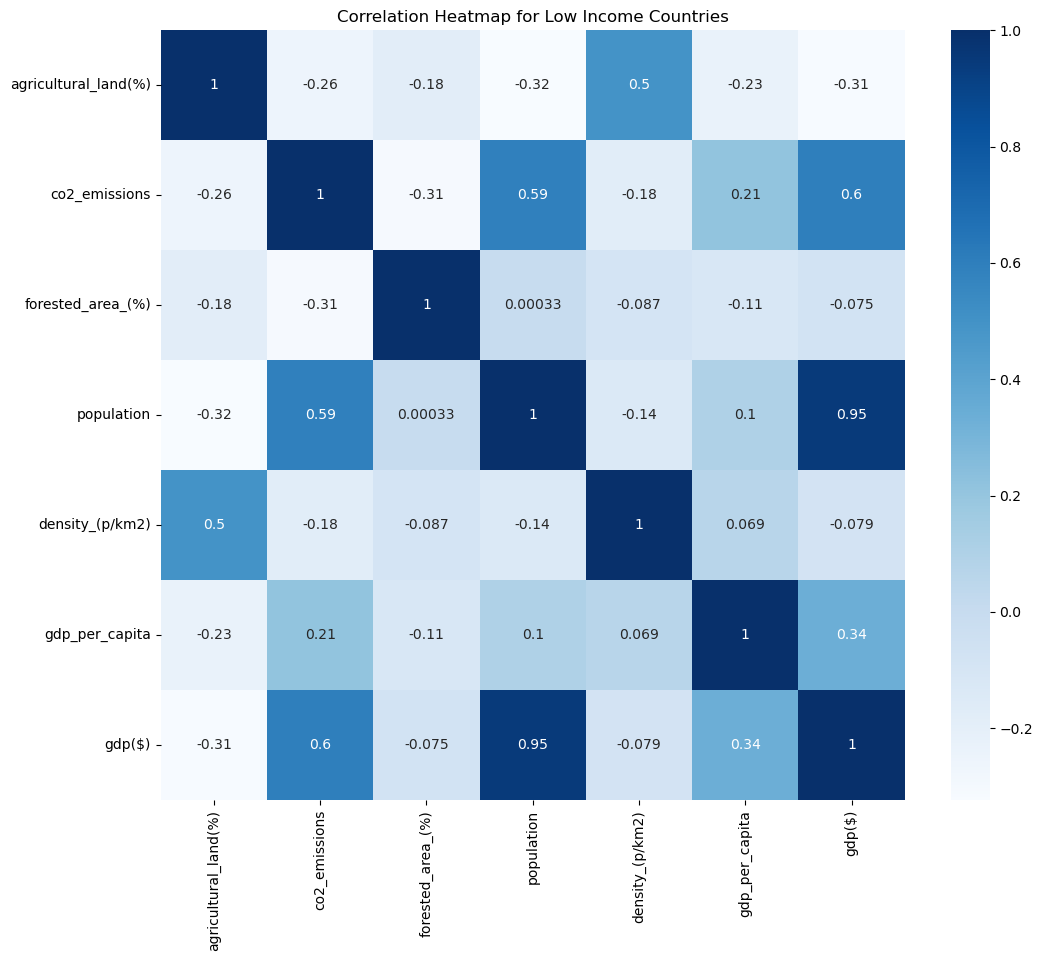

In [214]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 10))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_lo, annot=True, cmap="Blues")

plt.title("Correlation Heatmap for Low Income Countries")
plt.show()

In [215]:
# WITHOUT OUTLIERS
no_outliers_corr_lo = data_cleaning.remove_outliers(num_4,"co2_emissions")

In [216]:
# correlation between numerical continuous variables
correlation_matrix_no_lo = no_outliers_corr_lo.corr()
correlation_matrix_no_lo

,agricultural_land(%),co2_emissions,forested_area_(%),population,density_(p/km2),gdp_per_capita,gdp($)
agricultural_land(%),1.000000,-0.075102,-0.234861,-0.276126,0.484653,-0.261514,-0.333003
co2_emissions,-0.075102,1.000000,-0.292537,0.402884,-0.130035,0.433735,0.575226
forested_area_(%),-0.234861,-0.292537,1.000000,0.131528,-0.109829,-0.126143,0.014603
population,-0.276126,0.402884,0.131528,1.000000,-0.151402,0.006984,0.916886
density_(p/km2),0.484653,-0.130035,-0.109829,-0.151402,1.000000,0.048007,-0.105639
gdp_per_capita,-0.261514,0.433735,-0.126143,0.006984,0.048007,1.000000,0.354803
gdp($),-0.333003,0.575226,0.014603,0.916886,-0.105639,0.354803,1.000000


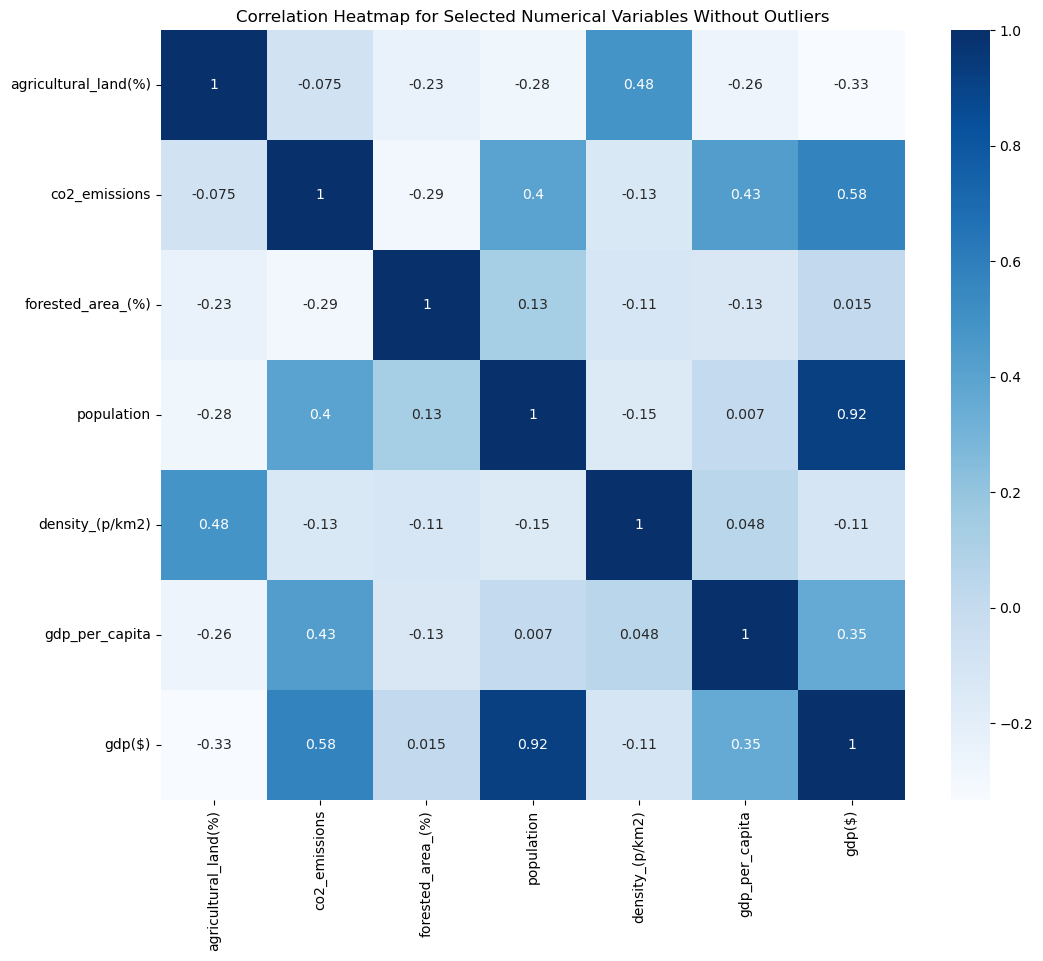

In [217]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 10))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_no_lo, annot=True, cmap="Blues")

plt.title("Correlation Heatmap for Selected Numerical Variables Without Outliers")
plt.show()